In [1]:
import pandas as pd
netflix_data = pd.read_csv("netflix_titles.csv")
netflix_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
#

missing_values = netflix_data.isnull().sum()

# Extracting year from date_added
netflix_data['date_added'] = pd.to_datetime(netflix_data['date_added'])
netflix_data['year_added'] = netflix_data['date_added'].dt.year

# Checking the first few rows after modification
first_rows_modified = netflix_data.head()

missing_values, first_rows_modified


(show_id            0
 type               0
 title              0
 director        2634
 cast             825
 country          831
 date_added        10
 release_year       0
 rating             4
 duration           3
 listed_in          0
 description        0
 dtype: int64,
   show_id     type                  title         director  \
 0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
 1      s2  TV Show          Blood & Water              NaN   
 2      s3  TV Show              Ganglands  Julien Leclercq   
 3      s4  TV Show  Jailbirds New Orleans              NaN   
 4      s5  TV Show           Kota Factory              NaN   
 
                                                 cast        country  \
 0                                                NaN  United States   
 1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
 2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
 3                                                NaN

In [3]:
# Addressing missing values

# Filling missing values for 'director', 'cast', and 'country' with 'Unknown'
netflix_data['director'].fillna('Unknown', inplace=True)
netflix_data['cast'].fillna('Unknown', inplace=True)
netflix_data['country'].fillna('Unknown', inplace=True)

# For 'date_added', we'll drop rows where this is missing as it's crucial for trend analysis
netflix_data.dropna(subset=['date_added'], inplace=True)

# For 'rating' and 'duration', filling missing values with the mode (most frequent value)
rating_mode = netflix_data['rating'].mode()[0]
duration_mode = netflix_data['duration'].mode()[0]

netflix_data['rating'].fillna(rating_mode, inplace=True)
netflix_data['duration'].fillna(duration_mode, inplace=True)

# Check if all missing values are addressed
remaining_missing_values = netflix_data.isnull().sum()
remaining_missing_values


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

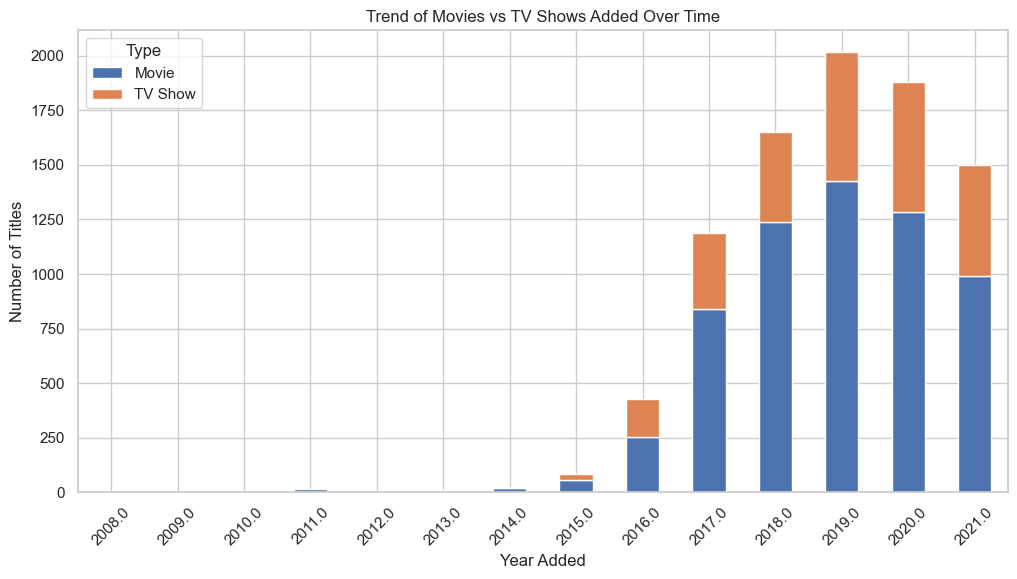

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization style
sns.set(style="whitegrid")

# Trend analysis: Movies vs TV Shows over time

# Counting the number of movies and TV shows added each year
content_trend = netflix_data.groupby(['year_added', 'type']).size().unstack().fillna(0)

# Plotting the trend
plt.figure(figsize=(12, 6))
content_trend.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Trend of Movies vs TV Shows Added Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.show()


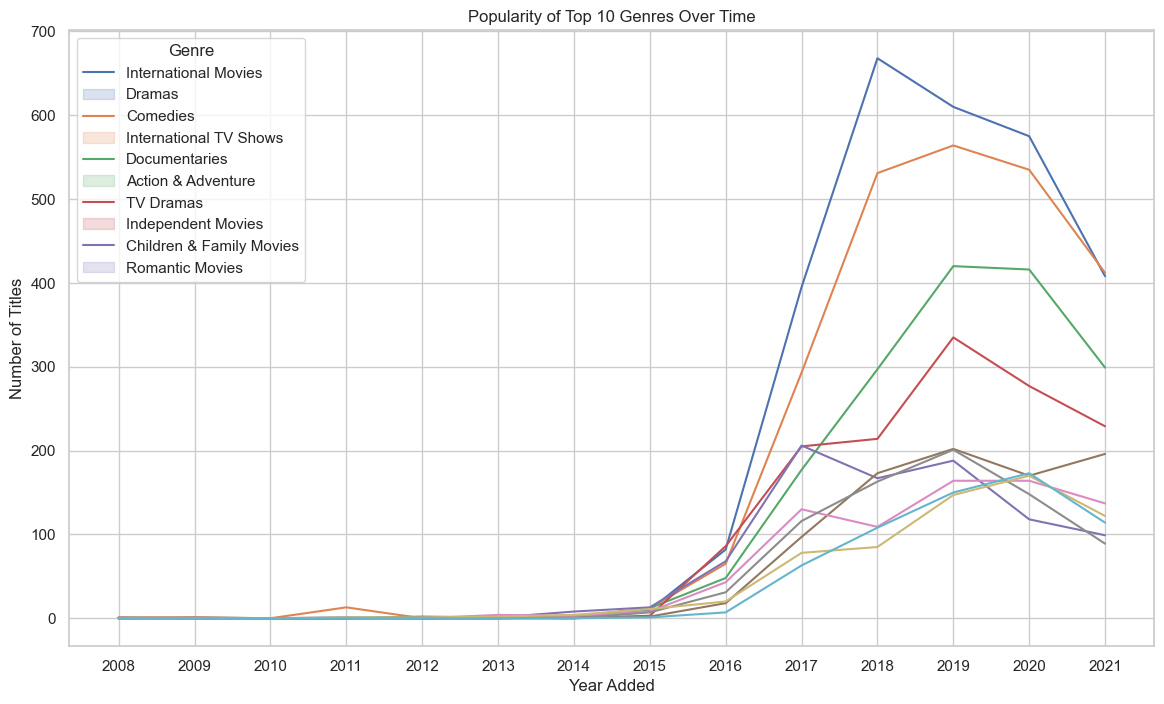

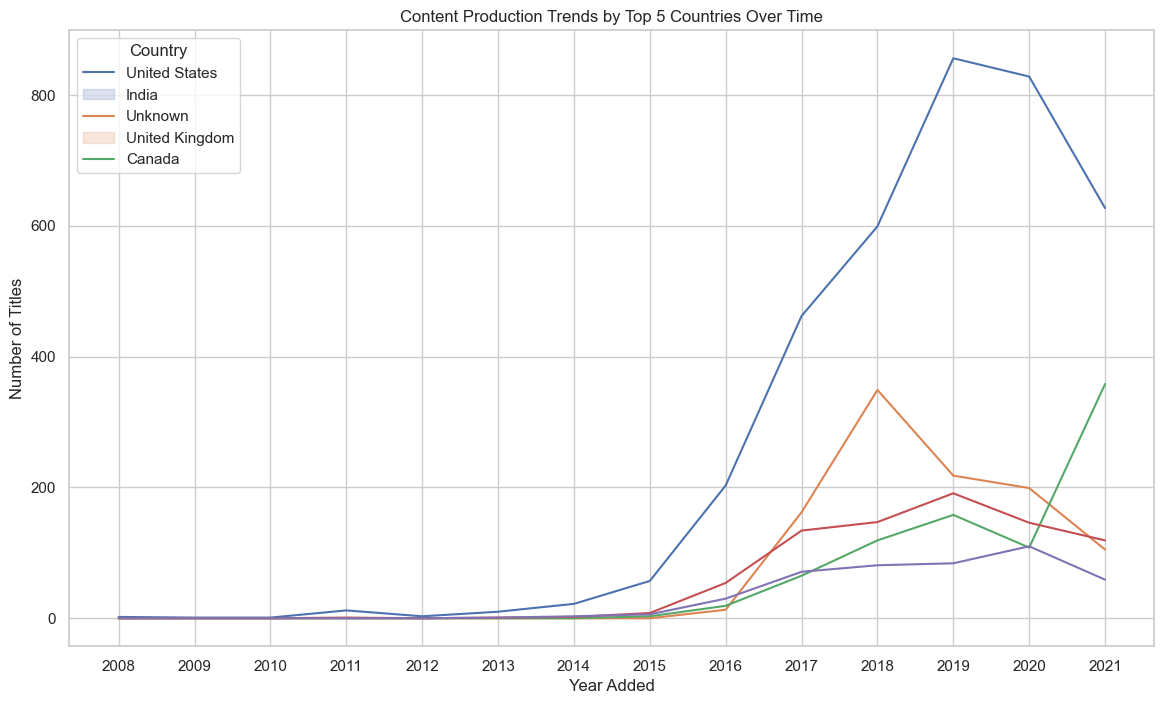

In [5]:
import numpy as np

# Genre Analysis: Popularity of different genres over time

# Splitting the 'listed_in' column into individual genres
genre_data = netflix_data.copy()
genre_data['listed_in'] = genre_data['listed_in'].str.split(', ')
genre_data = genre_data.explode('listed_in')

# Counting the occurrences of each genre per year
genre_trend = genre_data.groupby(['year_added', 'listed_in']).size().unstack().fillna(0)

# Plotting the top 10 genres over time
top_genres = genre_trend.sum().sort_values(ascending=False).head(10).index
genre_trend_top = genre_trend[top_genres]

plt.figure(figsize=(14, 8))
sns.lineplot(data=genre_trend_top, dashes=False)
plt.title('Popularity of Top 10 Genres Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(np.arange(genre_trend_top.index.min(), genre_trend_top.index.max() + 1, 1.0))
plt.legend(title='Genre', labels=top_genres)
plt.show()

# Country-Specific Trends: Content production trends by country

# Counting the number of titles per country per year
country_data = netflix_data.copy()
country_data['country'] = country_data['country'].str.split(', ')
country_data = country_data.explode('country')

country_trend = country_data.groupby(['year_added', 'country']).size().unstack().fillna(0)

# Plotting the top 5 countries over time
top_countries = country_trend.sum().sort_values(ascending=False).head(5).index
country_trend_top = country_trend[top_countries]

plt.figure(figsize=(14, 8))
sns.lineplot(data=country_trend_top, dashes=False)
plt.title('Content Production Trends by Top 5 Countries Over Time')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(np.arange(country_trend_top.index.min(), country_trend_top.index.max() + 1, 1.0))
plt.legend(title='Country', labels=top_countries)
plt.show()

C:\Users\Hieut\AppData\Local\Temp\ipykernel_32472\10171966.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration_numeric'] = movies_data['duration'].str.extract(r'(\d+)').astype(int)
C:\Users\Hieut\AppData\Local\Temp\ipykernel_32472\10171966.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['seasons_numeric'] = tv_shows_data['duration'].str.extract(r'(\d+)').astype(int)


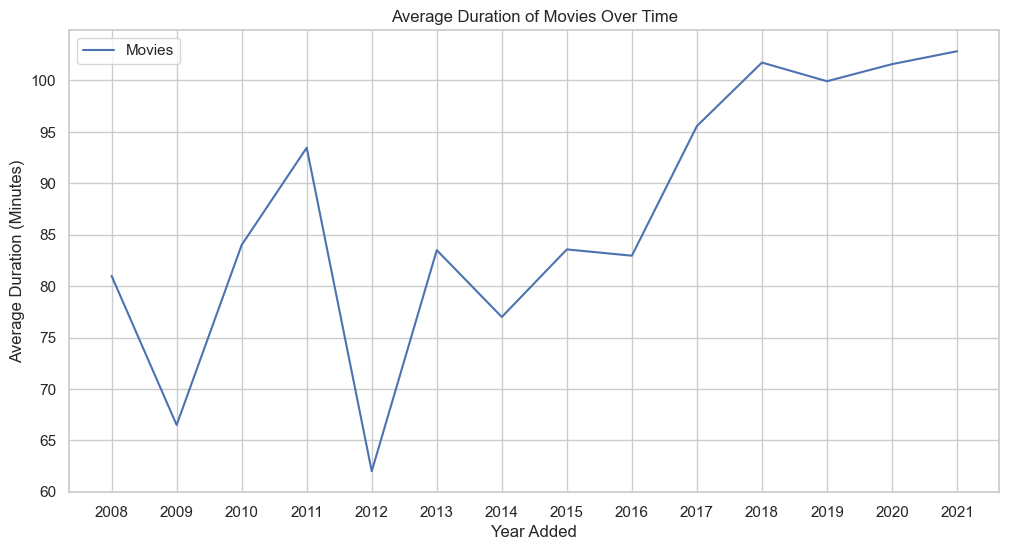

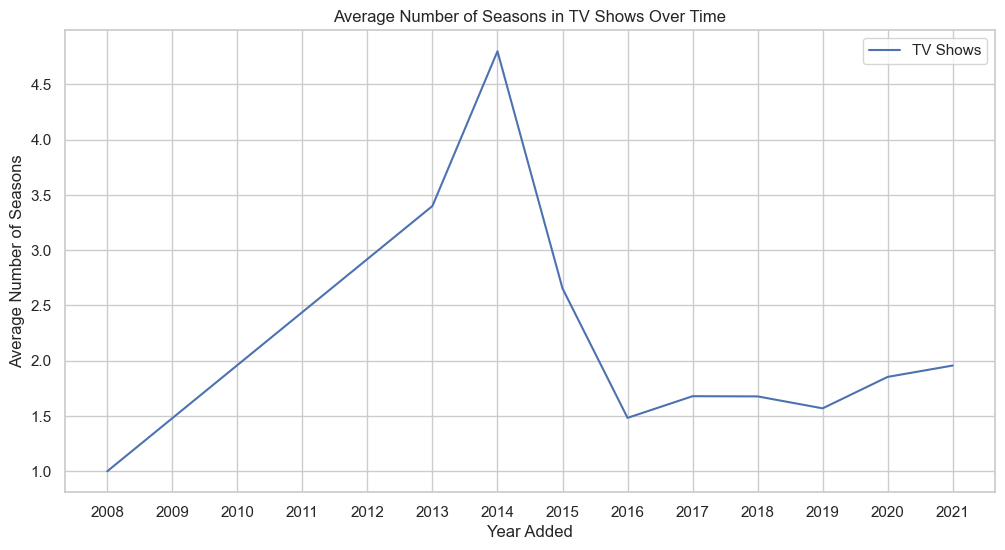

In [6]:
# Duration/Seasons Analysis: Trends in movie durations and TV show seasons

# Separate data into movies and TV shows
movies_data = netflix_data[netflix_data['type'] == 'Movie']
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

# Extracting numeric duration for movies
movies_data['duration_numeric'] = movies_data['duration'].str.extract(r'(\d+)').astype(int)

# Extracting numeric seasons for TV shows
tv_shows_data['seasons_numeric'] = tv_shows_data['duration'].str.extract(r'(\d+)').astype(int)

# Analyzing trends in movie durations
duration_trend_movies = movies_data.groupby('year_added')['duration_numeric'].mean()

# Analyzing trends in TV show seasons
seasons_trend_tv_shows = tv_shows_data.groupby('year_added')['seasons_numeric'].mean()

# Plotting the trends
plt.figure(figsize=(12, 6))
sns.lineplot(x=duration_trend_movies.index, y=duration_trend_movies.values, label='Movies')
plt.title('Average Duration of Movies Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Duration (Minutes)')
plt.xticks(np.arange(duration_trend_movies.index.min(), duration_trend_movies.index.max() + 1, 1.0))
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x=seasons_trend_tv_shows.index, y=seasons_trend_tv_shows.values, label='TV Shows')
plt.title('Average Number of Seasons in TV Shows Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Number of Seasons')
plt.xticks(np.arange(seasons_trend_tv_shows.index.min(), seasons_trend_tv_shows.index.max() + 1, 1.0))
plt.legend()
plt.show()


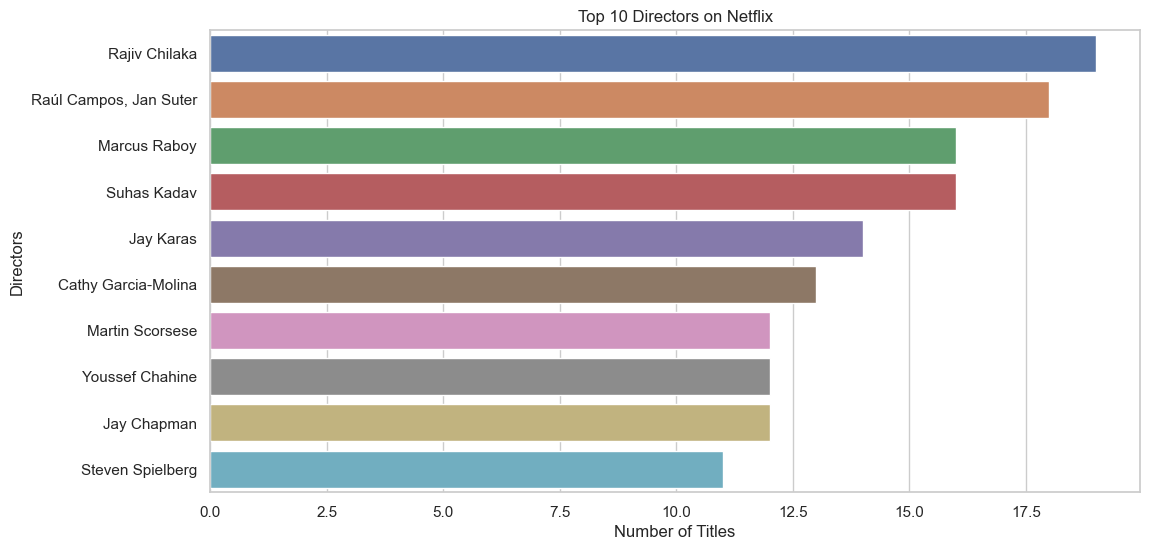

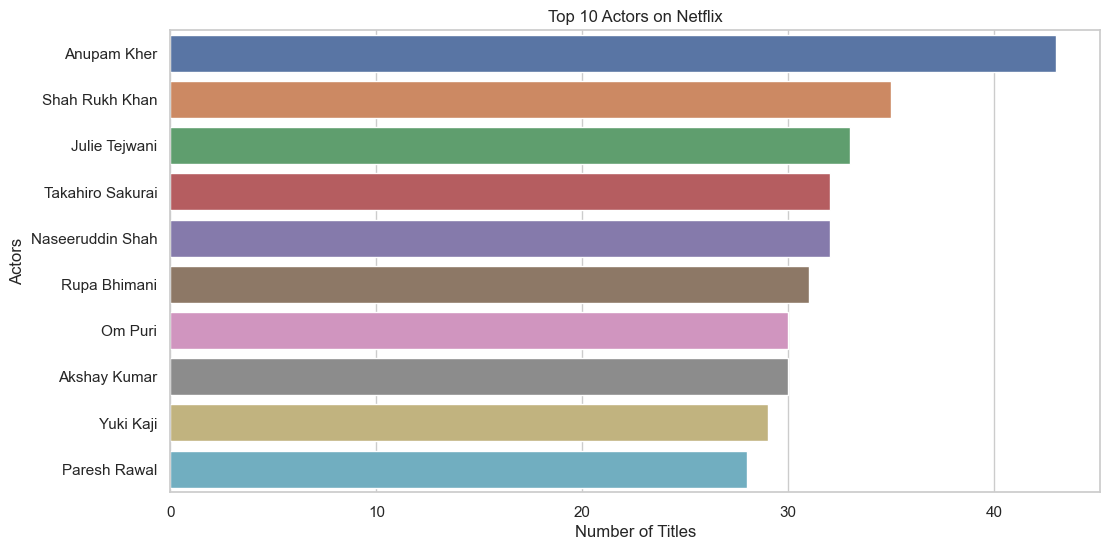

In [7]:
# Key Figures Analysis: Involvement of specific directors or actors

# Analyzing the most frequent directors on Netflix
top_directors = netflix_data[netflix_data['director'] != 'Unknown']['director'].value_counts().head(10)

# Analyzing the most frequent actors on Netflix
top_actors = netflix_data[netflix_data['cast'] != 'Unknown']['cast'].str.split(', ').explode().value_counts().head(10)

# Plotting the top directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Directors')
plt.show()

# Plotting the top actors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_actors.values, y=top_actors.index)
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Actors')
plt.show()


In [8]:
# Feature Engineering

# Content Age: Calculating the age of the content when it was added to Netflix
netflix_data['content_age'] = netflix_data['year_added'] - netflix_data['release_year']

# Seasonal Analysis: Extracting month and determining season
netflix_data['month_added'] = netflix_data['date_added'].dt.month
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
netflix_data['season_added'] = netflix_data['month_added'].map(seasons)

# Word Count of Descriptions: Counting the number of words in the description
netflix_data['description_word_count'] = netflix_data['description'].apply(lambda x: len(x.split()))

# Checking the first few rows with the new features
netflix_data[['title', 'content_age', 'season_added', 'description_word_count']].head()

,title,content_age,season_added,description_word_count
0,Dick Johnson Is Dead,1.0,Fall,27
1,Blood & Water,0.0,Fall,27
2,Ganglands,0.0,Fall,27
3,Jailbirds New Orleans,0.0,Fall,24
4,Kota Factory,0.0,Fall,24


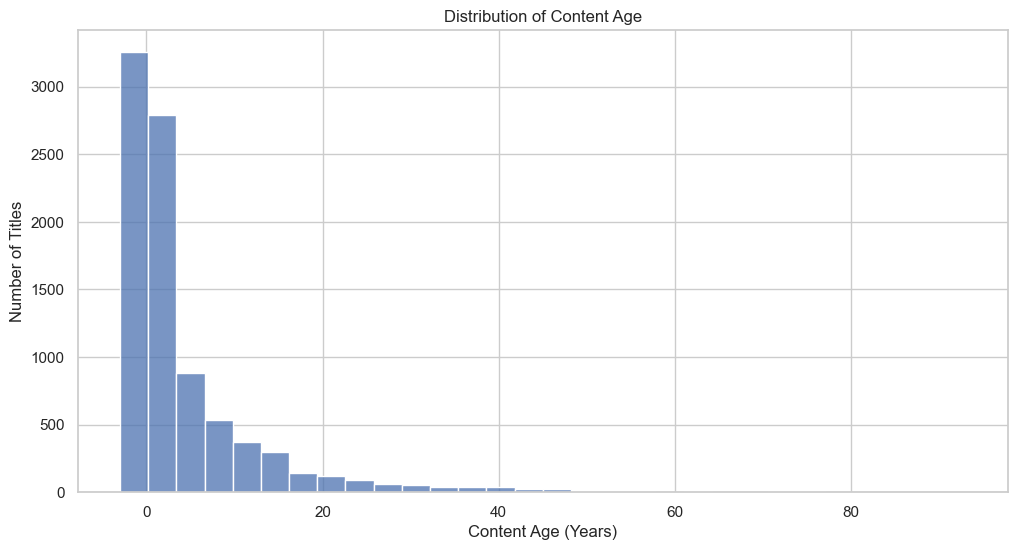

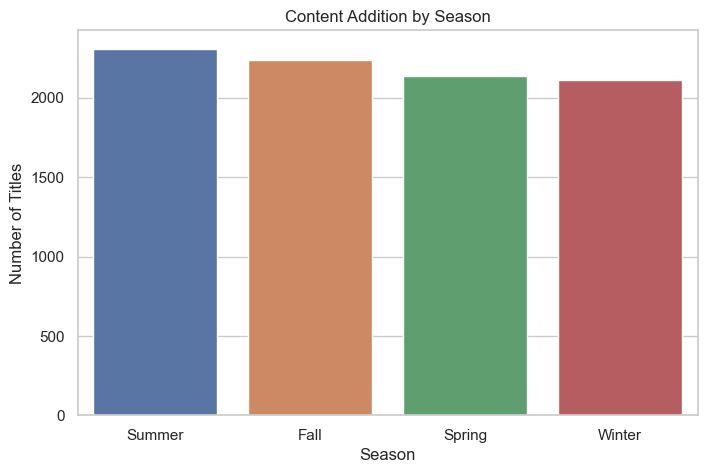

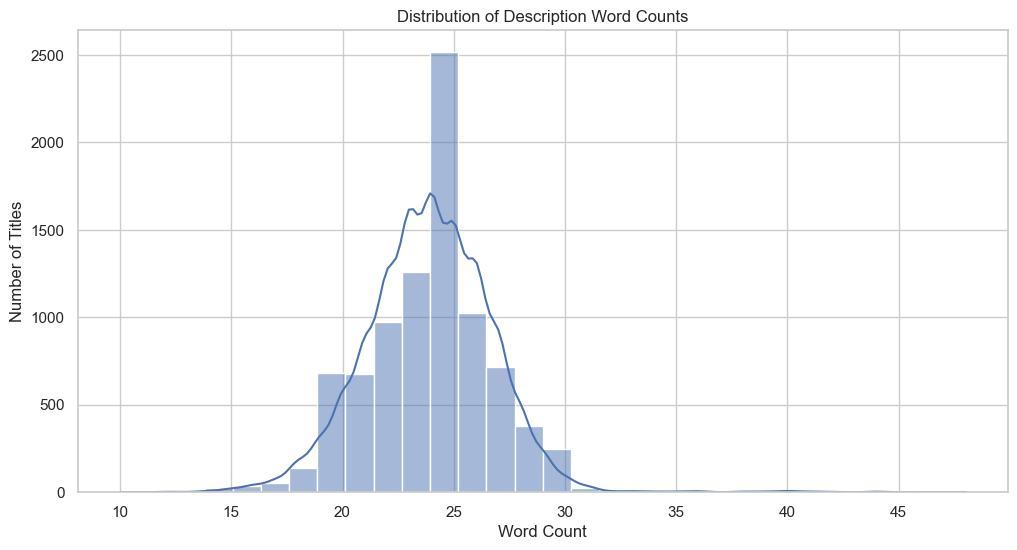

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing Content Age
plt.figure(figsize=(12, 6))
sns.histplot(netflix_data['content_age'], bins=30, kde=False)
plt.title('Distribution of Content Age')
plt.xlabel('Content Age (Years)')
plt.ylabel('Number of Titles')
plt.show()

# Analyzing Seasonal Trends in Content Addition
season_counts = netflix_data['season_added'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=season_counts.index, y=season_counts.values)
plt.title('Content Addition by Season')
plt.xlabel('Season')
plt.ylabel('Number of Titles')
plt.show()

# Analyzing Description Word Count
plt.figure(figsize=(12, 6))
sns.histplot(netflix_data['description_word_count'], bins=30, kde=True)
plt.title('Distribution of Description Word Counts')
plt.xlabel('Word Count')
plt.ylabel('Number of Titles')
plt.show()


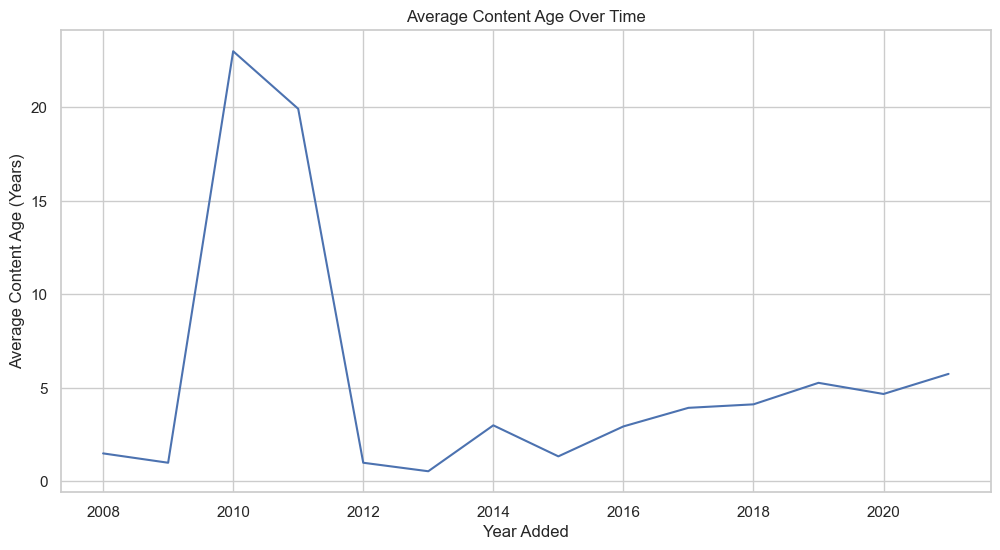

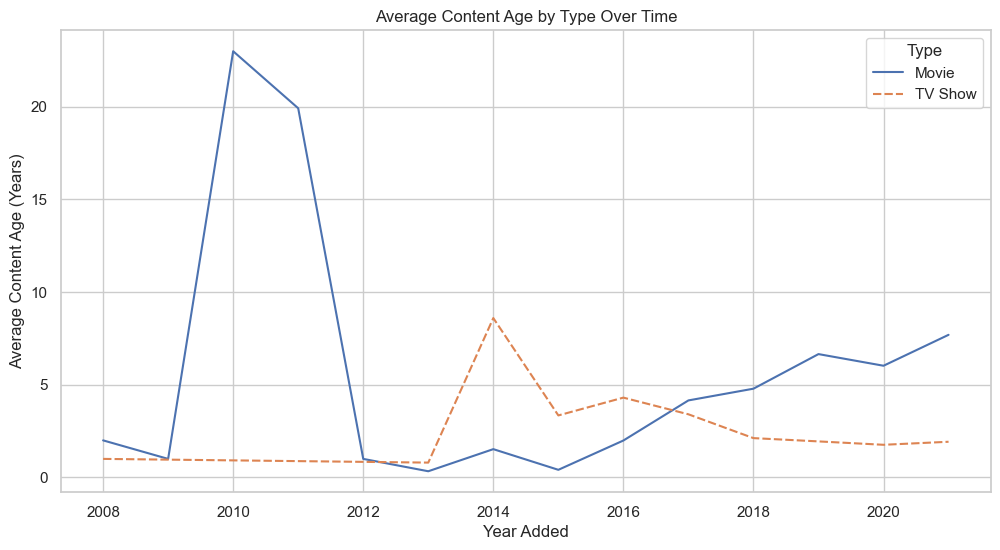

In [10]:
# Content Age Analysis

# Separate data into movies and TV shows
movies_data = netflix_data[netflix_data['type'] == 'Movie']
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

# Content Age Trend Over Time
content_age_trend = netflix_data.groupby('year_added')['content_age'].mean()

# Content Age by Type
content_age_by_type = netflix_data.groupby(['year_added', 'type'])['content_age'].mean().unstack()

# Plotting Content Age Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_age_trend)
plt.title('Average Content Age Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Content Age (Years)')
plt.show()

# Plotting Content Age by Type
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_age_by_type)
plt.title('Average Content Age by Type Over Time')
plt.xlabel('Year Added')
plt.ylabel('Average Content Age (Years)')
plt.legend(title='Type')
plt.show()

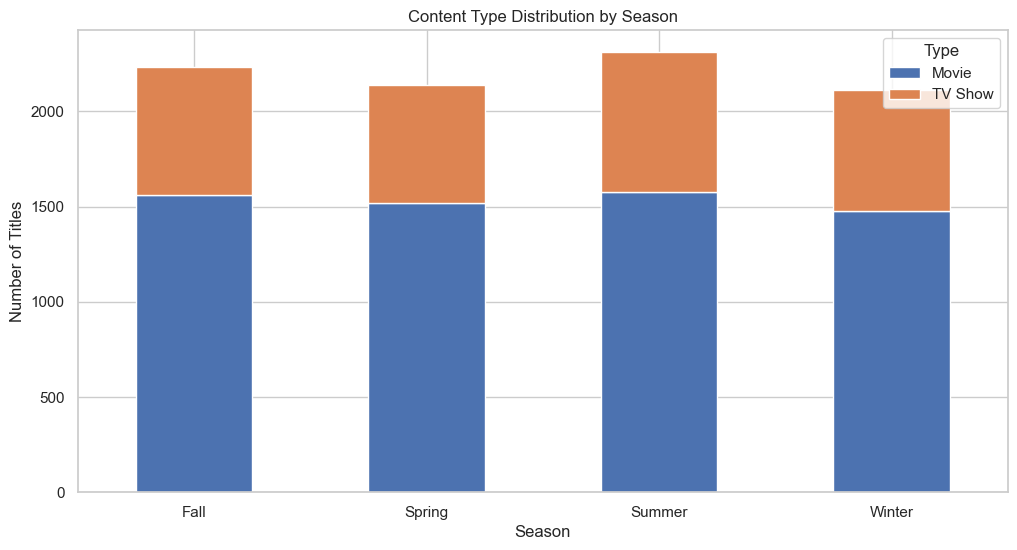

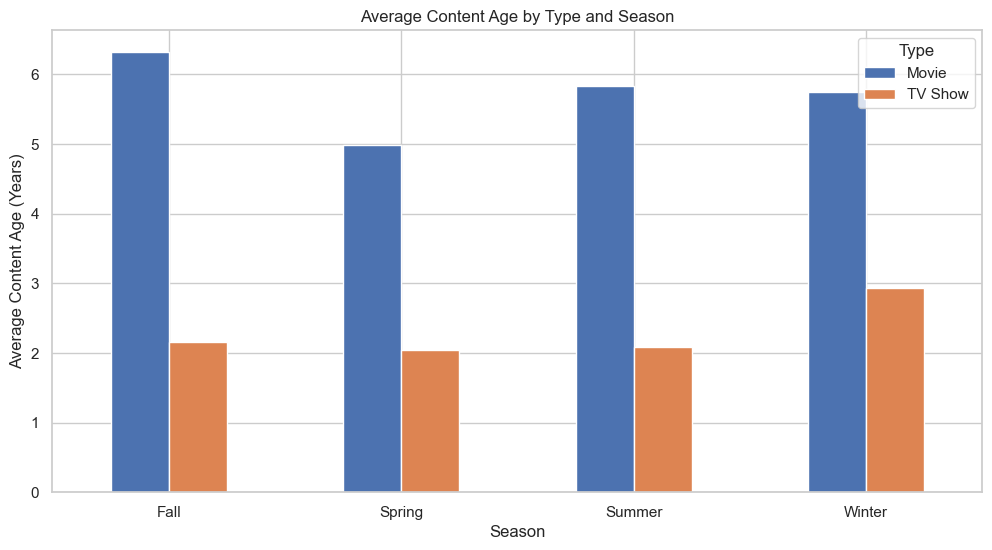

In [15]:
# Seasonal Trends Analysis

# Analyzing Content Type by Season
content_type_season = netflix_data.groupby(['season_added', 'type']).size().unstack()

# Analyzing Content Age by Season
content_age_season = netflix_data.groupby(['season_added', 'type'])['content_age'].mean().unstack()

# Plotting Content Type by Season
plt.figure(figsize=(12, 6))
content_type_season.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Content Type Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Number of Titles')
plt.xticks(rotation=0)
plt.legend(title='Type')
plt.show()

# Plotting Content Age by Season
plt.figure(figsize=(12, 6))
content_age_season.plot(kind='bar', ax=plt.gca())
plt.title('Average Content Age by Type and Season')
plt.xlabel('Season')
plt.ylabel('Average Content Age (Years)')
plt.xticks(rotation=0)
plt.legend(title='Type')
plt.show()

C:\Users\Hieut\AppData\Local\Temp\ipykernel_32472\1649713993.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows_data['seasons_numeric'] = tv_shows_data['duration'].str.extract(r'(\d+)').astype(int)
C:\Users\Hieut\AppData\Local\Temp\ipykernel_32472\1649713993.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_data['duration_numeric'] = movies_data['duration'].str.extract(r'(\d+)').astype(int)


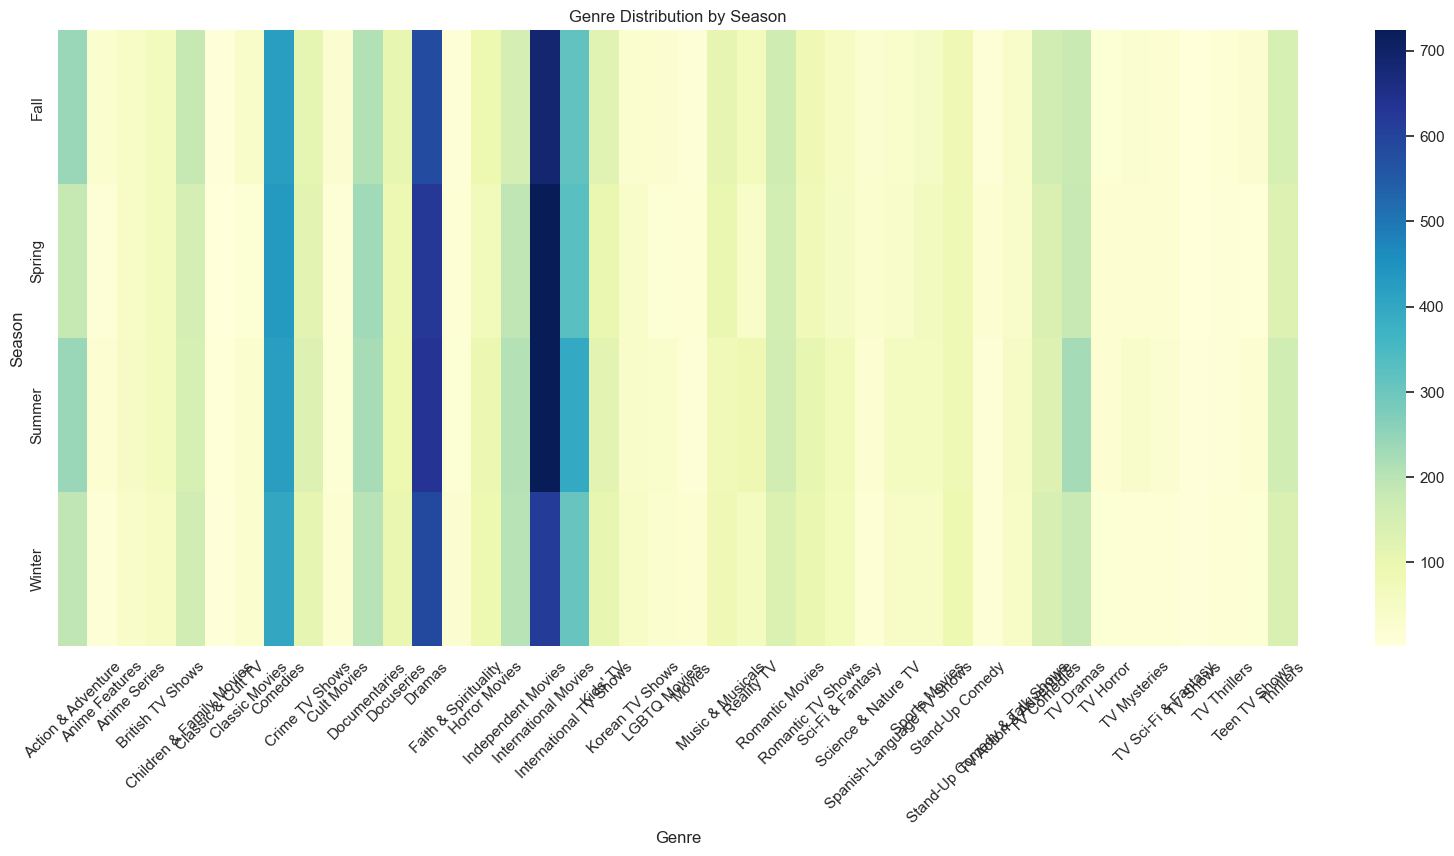

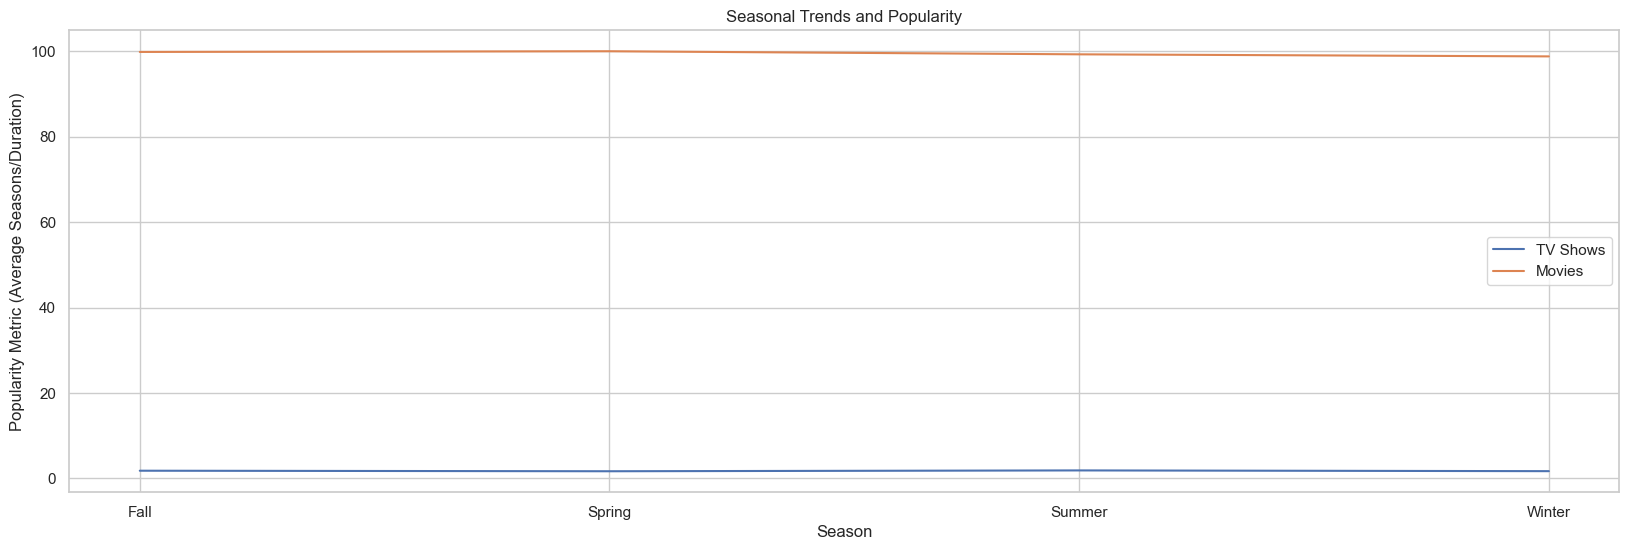

In [19]:
# Recreating the 'season_added' feature
netflix_data['month_added'] = netflix_data['date_added'].dt.month
seasons = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 
           6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
netflix_data['season_added'] = netflix_data['month_added'].map(seasons)

# Genre Distribution by Season
# Splitting genres for analysis
genre_season_data = netflix_data.copy()
genre_season_data['listed_in'] = genre_season_data['listed_in'].str.split(', ')
genre_season_data = genre_season_data.explode('listed_in')
# Aggregating by genre and season
genre_season_trend = genre_season_data.groupby(['season_added', 'listed_in']).size().unstack().fillna(0)

# Seasonal Trends and Popularity
# Separate data into movies and TV shows
movies_data = netflix_data[netflix_data['type'] == 'Movie']
tv_shows_data = netflix_data[netflix_data['type'] == 'TV Show']

# Extracting numeric seasons for TV shows and numeric duration for movies
tv_shows_data['seasons_numeric'] = tv_shows_data['duration'].str.extract(r'(\d+)').astype(int)
movies_data['duration_numeric'] = movies_data['duration'].str.extract(r'(\d+)').astype(int)

# Popularity metric for TV Shows (average number of seasons)
popularity_tv_season = tv_shows_data.groupby(['season_added'])['seasons_numeric'].mean()

# Popularity metric for Movies (average duration)
popularity_movie_season = movies_data.groupby(['season_added'])['duration_numeric'].mean()

# Plotting Genre Distribution by Season
plt.figure(figsize=(20, 8))
sns.heatmap(genre_season_trend, cmap="YlGnBu")
plt.title('Genre Distribution by Season')
plt.xlabel('Genre')
plt.ylabel('Season')
plt.xticks(rotation=45)
plt.show()

# Plotting Popularity by Season for TV Shows and Movies
plt.figure(figsize=(20, 6))
sns.lineplot(data=popularity_tv_season, label='TV Shows')
sns.lineplot(data=popularity_movie_season, label='Movies')
plt.title('Seasonal Trends and Popularity')
plt.xlabel('Season')
plt.ylabel('Popularity Metric (Average Seasons/Duration)')
plt.legend()
plt.show()


In [ ]:
#more code if possible

### ANALYSIS HERE